# Lending Club Case Study

### Group Members:
1. Deepa Kushwaha
2. Tanmaya Kharyal


## Data Understanding

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np                      # For mathematical calculations 
import matplotlib.pyplot as plt         # For plotting graphs 
import seaborn as sns                   # For visualizations
%matplotlib inline
 
import warnings                        # To ignore any warnings
warnings.filterwarnings('ignore')


In [2]:
# Getting the system ready and loading the data
loan_df= pd.read_csv('loan.csv',encoding = "ISO-8859-1")
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_df.shape

(39717, 111)

In [4]:
loan_df.columns           # we will check which features are present in our loan_data

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan_df.info(111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                int64
member_id                         int64
loan_amnt                         int64
funded_amnt                       int64
funded_amnt_inv                   float64
term                              object
int_rate                          object
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        float64
verification_status               object
issue_d                           object
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title                         

In [7]:
loan_df.describe()     # overview of the statitics of part

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleaning:

In [8]:
#function to get missing values in %
def missing(loan_df):
    print (round((loan_df.isnull().sum() * 100/ len(loan_df)),2).sort_values(ascending=False))

missing(loan_df)

total_il_high_credit_limit     100.0
mo_sin_old_rev_tl_op           100.0
bc_util                        100.0
bc_open_to_buy                 100.0
avg_cur_bal                    100.0
acc_open_past_24mths           100.0
inq_last_12m                   100.0
total_cu_tl                    100.0
inq_fi                         100.0
total_rev_hi_lim               100.0
all_util                       100.0
max_bal_bc                     100.0
open_rv_24m                    100.0
open_rv_12m                    100.0
il_util                        100.0
total_bal_il                   100.0
mths_since_rcnt_il             100.0
open_il_24m                    100.0
open_il_12m                    100.0
open_il_6m                     100.0
open_acc_6m                    100.0
tot_cur_bal                    100.0
tot_coll_amt                   100.0
total_bc_limit                 100.0
dti_joint                      100.0
annual_inc_joint               100.0
mths_since_last_major_derog    100.0
m

,Total,Percent
total_il_high_credit_limit,39717,1.0
mo_sin_old_rev_tl_op,39717,1.0
bc_util,39717,1.0
bc_open_to_buy,39717,1.0
avg_cur_bal,39717,1.0


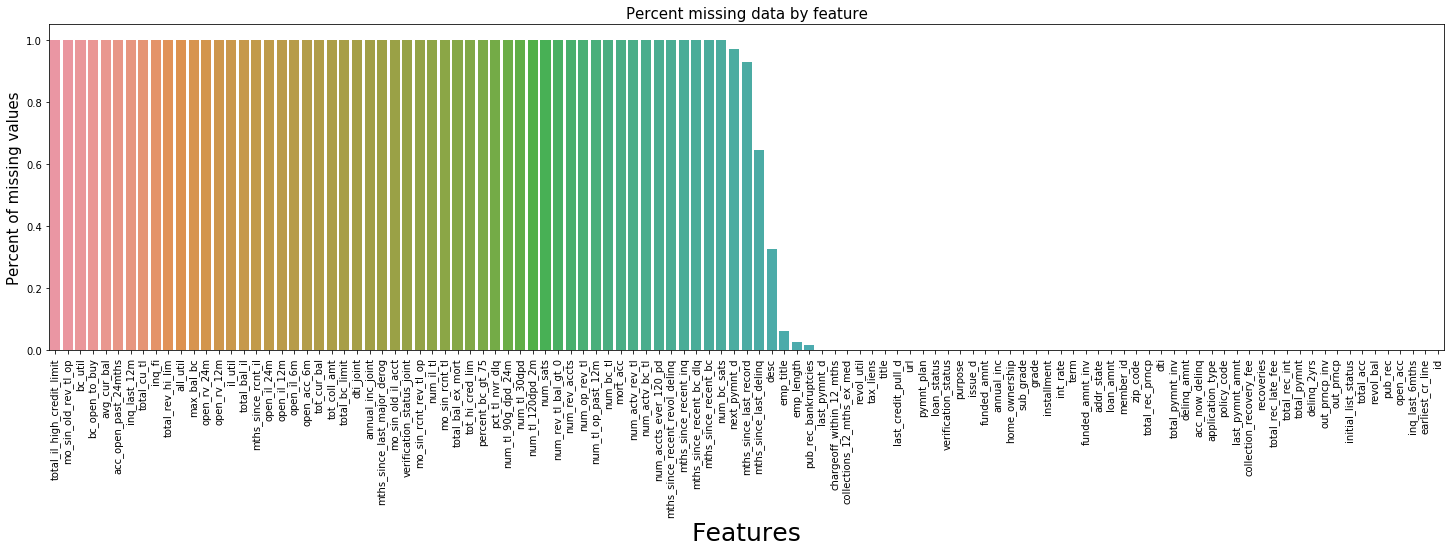

In [9]:
# Potting the graph for missing values status
total = loan_df.isnull().sum().sort_values(ascending=False)
percent = (loan_df.isnull().sum()/loan_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(25, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=25)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [10]:
loan_df= loan_df.dropna(thresh=loan_df.shape[0]*0.7,how='all',axis=1)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
loan_df.shape

(39717, 53)

In [12]:
loan_df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [13]:
loan_df.duplicated().sum()

0

In [14]:
#dropping dataframe columns with only one distinct value

nunique = loan_df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
loan_df=loan_df.drop(cols_to_drop, axis=1)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [15]:
loan_df.shape

(39717, 44)

In [16]:
# Checking unique values(categories) present in the  attributes
categories_vars = list(loan_df.select_dtypes(include='object').columns)

for col in categories_vars:
    
    print("Column Name : {}\n Number of Categories: {}\n Unique Values : {} \n"\
              .format(col, loan_df[col].nunique(), loan_df[col].unique()))

Column Name : term
 Number of Categories: 2
 Unique Values : [' 36 months' ' 60 months'] 

Column Name : int_rate
 Number of Categories: 371
 Unique Values : ['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.59%' '24.40%' 

,Total,Percent
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
last_pymnt_d,71,0.001788
revol_util,50,0.001259


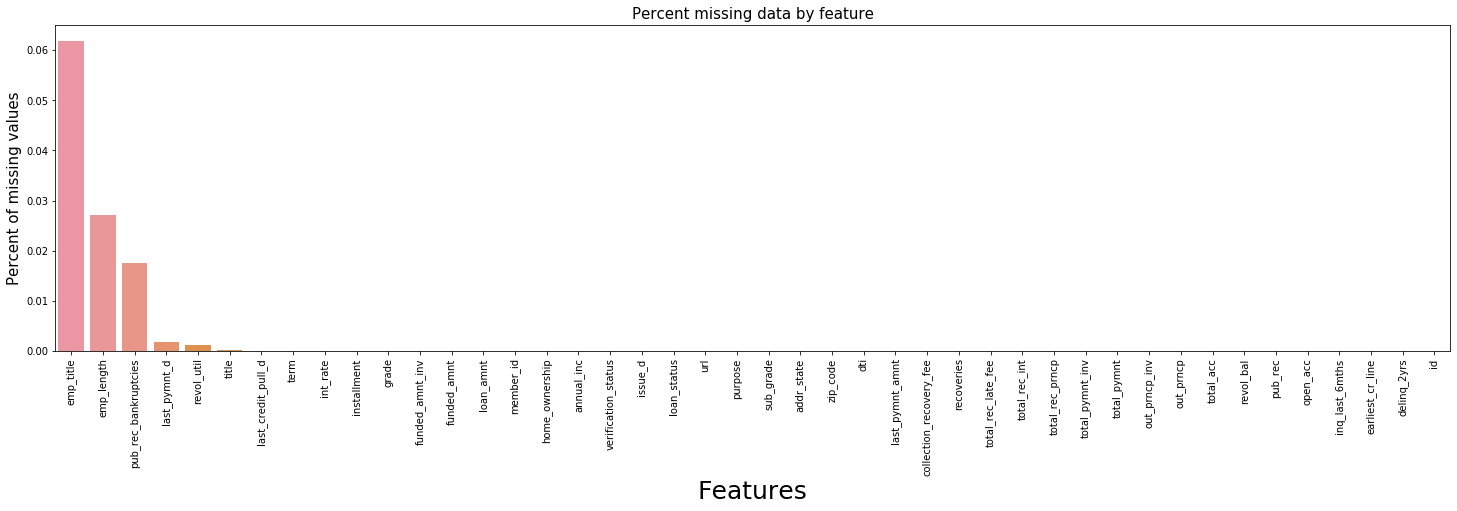

In [17]:
# After removing the missing values we plot again to view the missing values %

total = loan_df.isnull().sum().sort_values(ascending=False)
percent = (loan_df.isnull().sum()/loan_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(25, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=25)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [18]:
loan_df.isnull().sum() 

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prnc

In [19]:
loan_df.dtypes  

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

In [20]:
# Removing the null valued rows under the column "emp_title,"emp_length","title","revol_util","last_paymt" and "pub_rec_bankruptcies"
# Only these columns are left with null values

loan_df=loan_df[~loan_df.emp_title.isnull()]
loan_df=loan_df[~loan_df.emp_length.isnull()]
loan_df=loan_df[~loan_df.title.isnull()]
loan_df=loan_df[~loan_df.revol_util.isnull()]
loan_df=loan_df[~loan_df.last_pymnt_d.isnull()]
loan_df=loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

In [21]:
loan_df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

#### Null values aren't present anymore

In [22]:
loan_df.columns           # we will check which features present in our loan_data

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [23]:
loan_df.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc

**- From data dictionary which is provided along with dataset we can see that 'id','member_id' are random numbers.Hence removing them.** 

**- Values of 'funded_amnt' and 'funded_amnt_inv' are similar to that of loan_amnt. Hence removing them.**

**- URl and Zip code have no relation with loan default. Hence removing them.**

In [24]:
loan_df = loan_df.drop(['id','member_id','funded_amnt','funded_amnt_inv','url','zip_code'],axis=1)

In [25]:
loan_df.shape

(36433, 38)

#### Standarding precision of the following columns:
1. total_pymnt
2. total_rec_late_fee
3. collection_recovery_fee

In [26]:
loan_df.total_pymnt.value_counts().head()

11196.569430    26
11784.232230    16
13148.137860    15
10956.775960    13
5478.387981     13
Name: total_pymnt, dtype: int64

In [27]:
loan_df.total_pymnt.value_counts().tail()

5517.160000     1
12878.238670    1
4348.288927     1
8954.809409     1
4608.000000     1
Name: total_pymnt, dtype: int64

In [28]:
loan_df.total_rec_late_fee.value_counts().head()

0.0     34618
15.0      224
30.0       51
15.0       49
15.0       42
Name: total_rec_late_fee, dtype: int64

In [29]:
loan_df.total_rec_late_fee.value_counts().tail()

29.914662    1
23.820000    1
15.610000    1
59.781000    1
14.944409    1
Name: total_rec_late_fee, dtype: int64

In [30]:
loan_df.collection_recovery_fee.value_counts().tail()

18.3264     1
198.4078    1
9.6738      1
33.2896     1
93.3678     1
Name: collection_recovery_fee, dtype: int64

In [31]:
# rounding off the decimal value to 2 places
loan_df.total_pymnt= round(loan_df.total_pymnt,2)
loan_df.total_rec_late_fee= round(loan_df.total_rec_late_fee,2)
loan_df.collection_recovery_fee= round(loan_df.collection_recovery_fee,2)

In [32]:
loan_df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].info()    # there is no any null values present

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null object
earliest_cr_line      36433 non-null object
last_pymnt_d          36433 non-null object
last_credit_pull_d    36433 non-null object
dtypes: object(4)
memory usage: 1.4+ MB


#### Converting the datat type of date related columns from object  to datetime

In [33]:
loan_df.issue_d = pd.to_datetime(loan_df.issue_d,format='%b-%y')
loan_df.earliest_cr_line = pd.to_datetime(loan_df.earliest_cr_line,format='%b-%y')
loan_df.last_pymnt_d = pd.to_datetime(loan_df.last_pymnt_d,format='%b-%y')
loan_df.last_credit_pull_d = pd.to_datetime(loan_df.last_credit_pull_d,format='%b-%y')

In [34]:
loan_df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null datetime64[ns]
earliest_cr_line      36433 non-null datetime64[ns]
last_pymnt_d          36433 non-null datetime64[ns]
last_credit_pull_d    36433 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [35]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


In [36]:
loan_df[['int_rate','revol_util']].describe()      # 

,int_rate,revol_util
count,36433,36433
unique,334,1082
top,10.99%,0%
freq,901,852


In [37]:
loan_df[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
int_rate      36433 non-null object
revol_util    36433 non-null object
dtypes: object(2)
memory usage: 853.9+ KB


#### Converting the data type of int_rate and revol_util to float and stripping %

In [38]:
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%').astype('float')
loan_df['revol_util'] = loan_df['revol_util'].str.strip('%').astype('float')

In [39]:
loan_df[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
int_rate      36433 non-null float64
revol_util    36433 non-null float64
dtypes: float64(2)
memory usage: 853.9 KB


In [40]:
loan_df.term.describe()      # checked term variable status

count          36433
unique             2
top        36 months
freq           26377
Name: term, dtype: object

In [41]:
loan_df.term.values

array([' 60 months', ' 36 months', ' 60 months', ..., ' 36 months',
       ' 36 months', ' 36 months'], dtype=object)

In [42]:
loan_df.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

#### term has only 2 unique values: 36 and 60 months. Since we know these are month values, removing month from the value

In [43]:
loan_df['term'] = loan_df.term.apply(lambda x: x.strip('months'))

In [44]:
loan_df.term.value_counts()

 36     26377
 60     10056
Name: term, dtype: int64

In [45]:
loan_df.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

#### In the data dictionary it is mentioned that 0 means less than 1 year and 10 means 10+ years
#### Hence converting the values of the column (term) between 0 and 10. 

In [46]:
emp_length_replace = {'< 1 year' : 0,'1 year' : 1,'2 years' : 2,'3 years' : 3,'4 years' : 4,'5 years' : 5,'6 years' : 6,'7 years' : 7,'8 years' : 8,'9 years' : 9,
    '10+ years' : 10}
loan_df = loan_df.replace({"emp_length": emp_length_replace })

In [47]:
loan_df.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

#### Deriving month and year from issue date:

In [48]:
loan_df['issue_d_month'] = loan_df['issue_d'].dt.month
loan_df['issue_d_year'] =loan_df['issue_d'].dt.year

In [49]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
1,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,12,2011
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,12,2011
4,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,12,2011
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,12,2011
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,12,2011


## Exploratory Data Analysis  (EDA)

1. Univariate Analysis and
2. Bivariate Analysis

## Univariate Analysis: 
**In this section, where we examine each variable individually.**

#### We know that our target variable is loan_status. For easy calculations and clear analysis, we'll convert it into binary form, later. Before lets analyse it.  

In [50]:
loan_df.shape

(36433, 40)

[Text(0.5, 0, 'loan_status')]

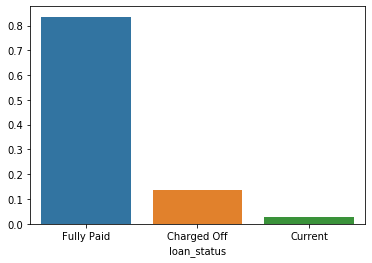

In [51]:
plt.plot(figsize= (30,25))
df= loan_df["loan_status"].value_counts(normalize=True)
sns.barplot(df.index, df.values).set(xlabel="loan_status")

#### Around 83% of customers have fully paid the loan. 

#### Since we are mainly concerned with fully paid and charged off loans. Lets concentrate on these two loan statuses. 

In [52]:
loan_df = loan_df[loan_df['loan_status'].isin(['Fully Paid','Charged Off'])]
loan_df.shape

(35367, 40)

In [53]:
loan_df.loan_status.describe()

count          35367
unique             2
top       Fully Paid
freq           30424
Name: loan_status, dtype: object

In [54]:
loan_df['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [55]:
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan_df['loan_status'] = loan_df['loan_status'].apply(lambda x: pd.to_numeric(x))

# checking the value of counts w.r.t to fully paid and charged off as calculated above
loan_df['loan_status'].value_counts()

0    30424
1     4943
Name: loan_status, dtype: int64

In [56]:
# default rate:
round(loan_df.loan_status.mean(),2)

0.14

#### There is about 14 % of default rate. ( Since, we have given charged off as value 1, the average hence provides the default rate)

In [57]:
# function to plot target variable(loan_status) w.r.t different variables 
def cat_plot(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=loan_df)
    plt.show()
    

#### Now, we'll be analysing different variables in accrordance to the charged off (defaulted loan)

## Categorical Variable Analysis:

### Variable grade and Subgrade:

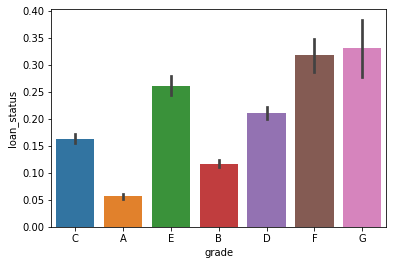

In [58]:
cat_plot('grade')

#### It is clearly visible that as the grade goes from A to G, defalut rate increases.

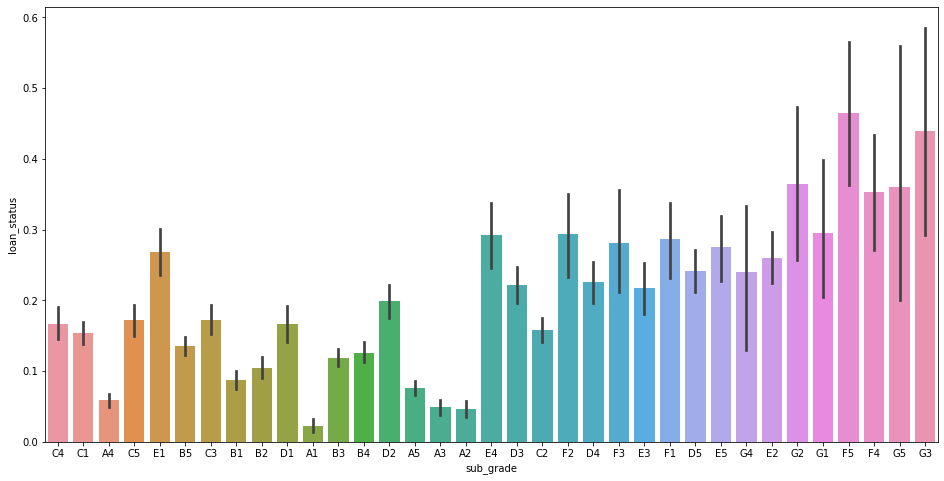

In [59]:
plt.figure(figsize=(16, 8))
cat_plot('sub_grade')

#### Again, in subgrade, it's seen from A to F , the first (i.e A1 , B1 and so on ) give the least defaulted rate. Only in G, G4 gives the least. 

### Variable term:

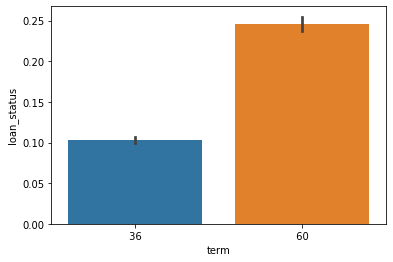

In [60]:
cat_plot('term')

#### Clearly, loan status with 60 months term has higher chances of default rate. 

### Variable Verification_status:

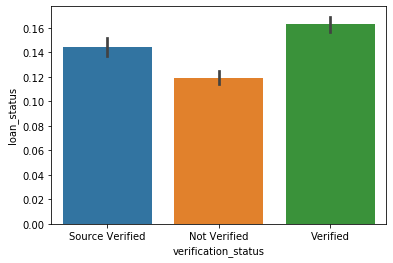

In [61]:
cat_plot('verification_status')

#### The Verified sources have the highest chances of default, which indeed seems to be surprising !This could be digged in later and understand with the bank as to why this happens !

### Variable Home_ownership

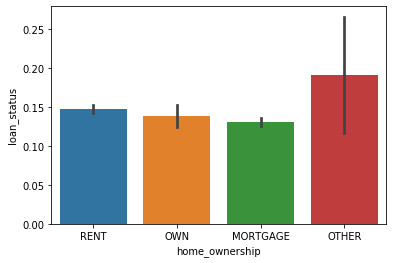

In [62]:
cat_plot('home_ownership')

#### There are no clear differences among this variable

### variable Purpose:

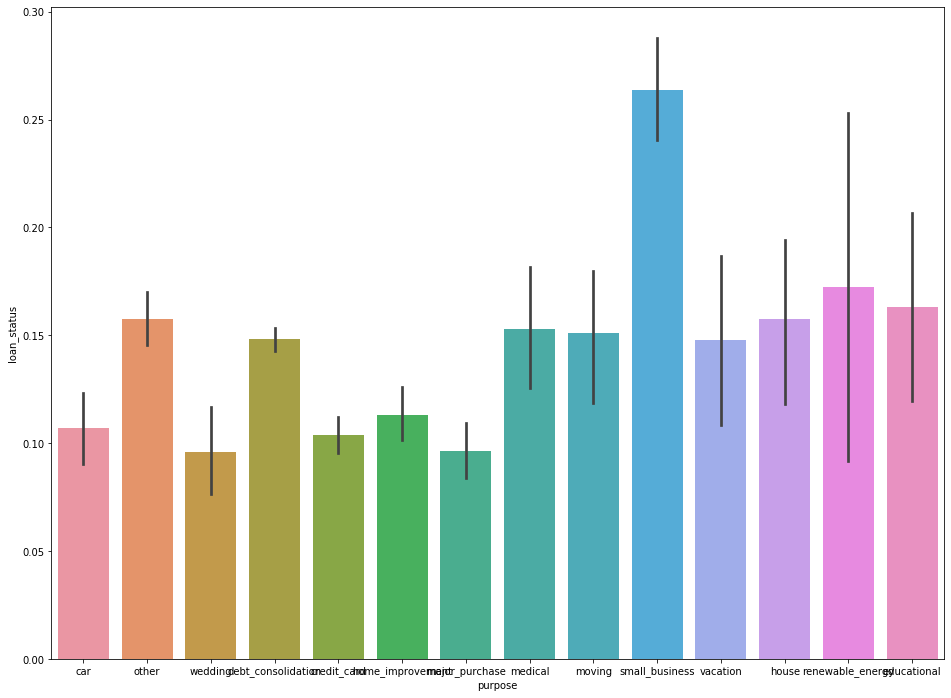

In [63]:
plt.figure(figsize=(16, 12))
cat_plot('purpose')

#### Clearly, loan with purpose, "small business" default the most ! 

### Analysing if grade, purpose and verification status exhibit power law. Considering these variables since they are the clear discriminators. 

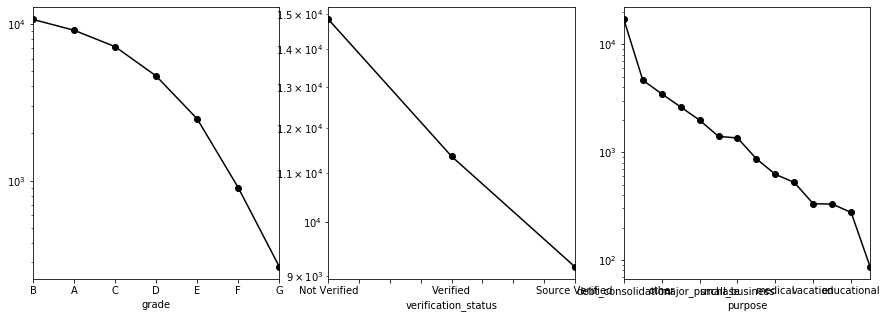

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
loan_df.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='k')
plt.subplot(1, 3, 2)
loan_df.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='k')
plt.subplot(1, 3, 3)                                                                                           
loan_df.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='k')



#### Clearly, purpose and verification status exhibit power law

## Numeric variables

### loan_amnt:

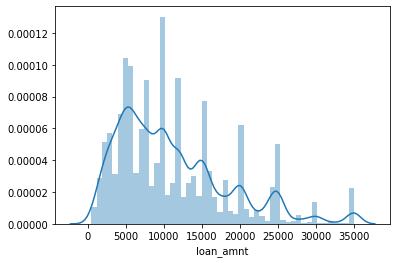

In [65]:
sns.distplot(loan_df['loan_amnt'])
plt.show()

#### Mostly the loan amount is 10000

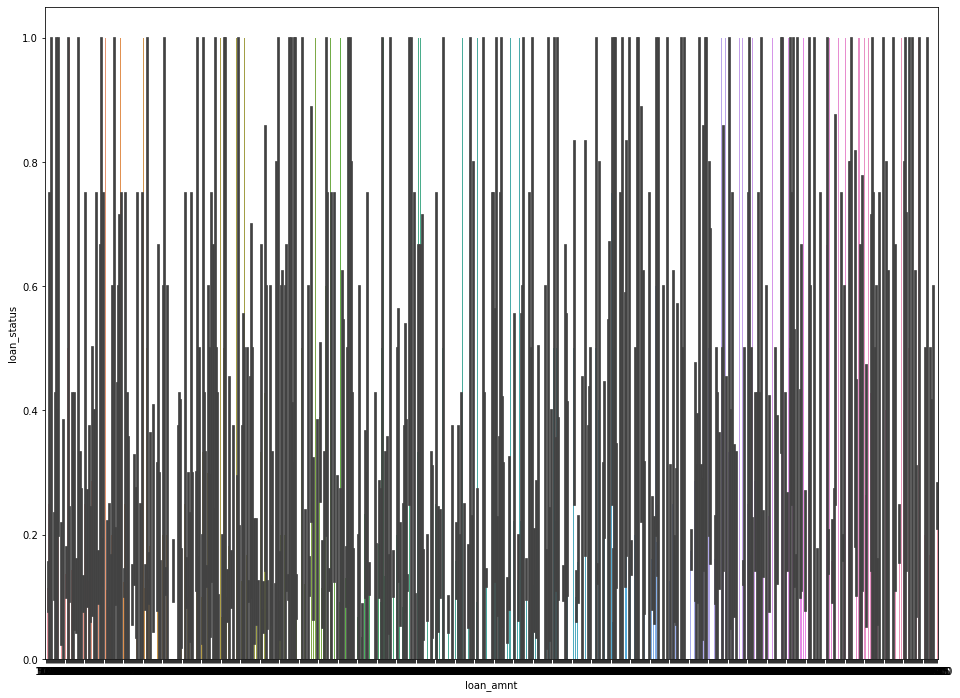

In [66]:
plt.figure(figsize=(16, 12))
cat_plot('loan_amnt')

### Since there are different loan amounts(in number), lets categorise them into categories:

In [67]:
# Categorising loan amt:
def loan_amt(amt):
    if amt < 5000:
        return 'low'
    elif amt >=5000 and amt < 15000:
        return 'medium'
    elif amt >= 15000 and amt < 25000:
        return 'high'
    else:
        return 'very high'

loan_df_cat=loan_df.copy()        # doing so because in vivariate we will be needing the values. 
loan_df_cat['loan_amnt'] = loan_df_cat['loan_amnt'].apply(lambda x: loan_amt(x))

In [68]:
#function for plotting for copied data
def cat_plot_copy(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=loan_df_cat)
    plt.show()
    

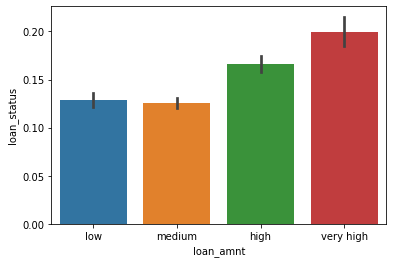

In [69]:
# Now plotting again with categoies:
cat_plot_copy('loan_amnt')

#### Clearly, higher the amount, higher are the chances of default !

### Interest Rate:

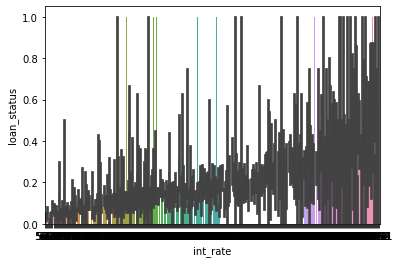

In [70]:
cat_plot('int_rate')

### Similarly, categorising int_rate:

In [71]:
def int_rate(rate):
    if rate <= 10:
        return 'low'
    elif rate > 10 and rate <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan_df_cat['int_rate'] = loan_df_cat['int_rate'].apply(lambda x: int_rate(x))

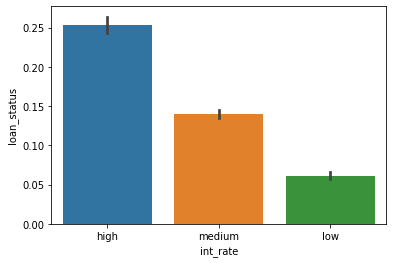

In [72]:
cat_plot_copy('int_rate')

#### Clearly, default rate is directly proportional int_rate

### pub_rec_bankruptcies

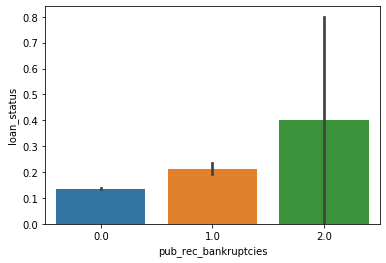

In [73]:
cat_plot('pub_rec_bankruptcies')

#### As expected, people with higher recorded bankruptcies, have higher chances of default !

### Annual Income

In [74]:
def annual_income(i):
    if i <= 50000:
        return 'low'
    elif i > 50000 and i <=100000:
        return 'medium'
    elif i > 100000 and i <=150000:
        return 'high'
    else:
        return 'very high'

loan_df_cat['annual_inc'] = loan_df_cat['annual_inc'].apply(lambda x: annual_income(x))

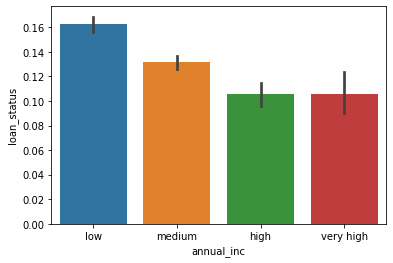

In [75]:
cat_plot_copy('annual_inc')

#### Lower income leads to maximum default

### Emp_length

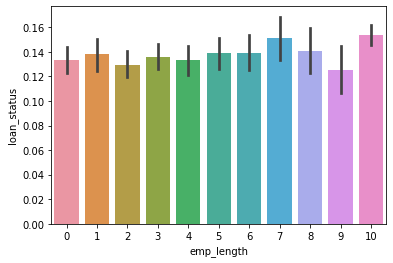

In [76]:
cat_plot('emp_length')

#### Doesn't predict much

## Let's Do some segmented univariate analysis

#### Since purpose is the most versatile variable, lets analyse it:

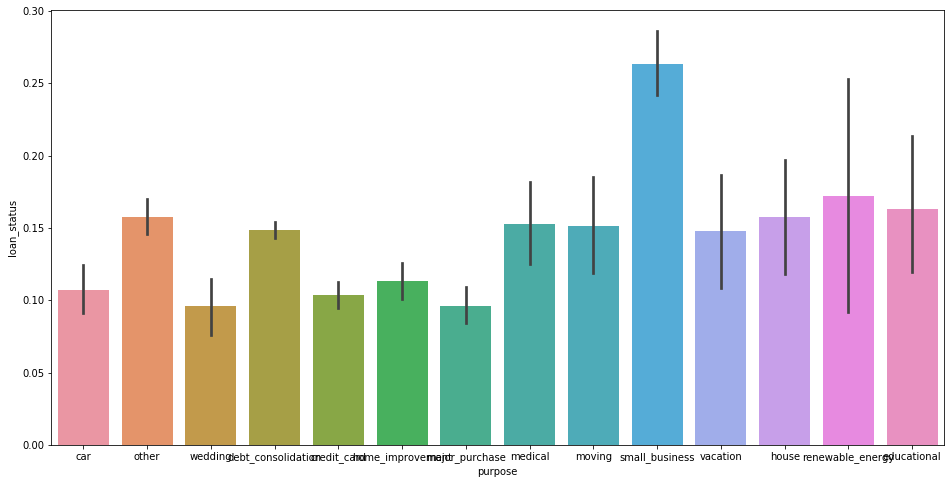

In [77]:
plt.figure(figsize=(16, 8))
cat_plot('purpose')

#### Clearly, the most defaults are in small business followed by renewable energy and education respectively. Let us now check as to for what purpose loan is asked mostly !

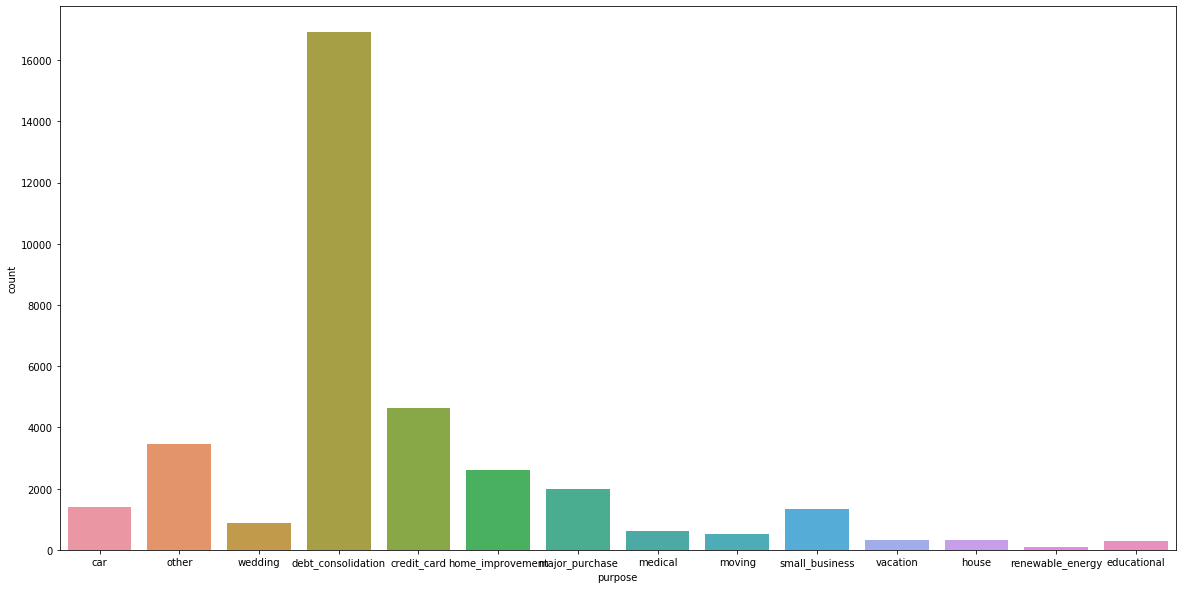

In [78]:
plt.figure(figsize=(20,10))
sns.countplot(x='purpose', data=loan_df)
plt.show()

#### Clearly, mostly the loan is taken for debt_consolidation followed by credit card and home improvement respectively. (Not considering others here, since it may include various other purposes). 

Let us analyse on these three purposes

In [79]:
top3_purposes=loan_df_cat[loan_df_cat['purpose'].isin(["debt_consolidation","credit_card","home_improvement"])]
top3_purposes.purpose.value_counts()

debt_consolidation    16911
credit_card            4626
home_improvement       2614
Name: purpose, dtype: int64

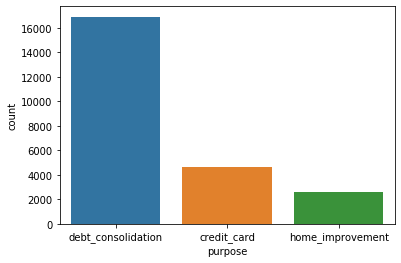

In [80]:
sns.countplot(x=top3_purposes['purpose'])
plt.show()

In [81]:
# function for segmented plots across various variables
def seg_plot(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=top3_purposes)
    plt.show()


### Analysing over variable that gave clear univariate analysis

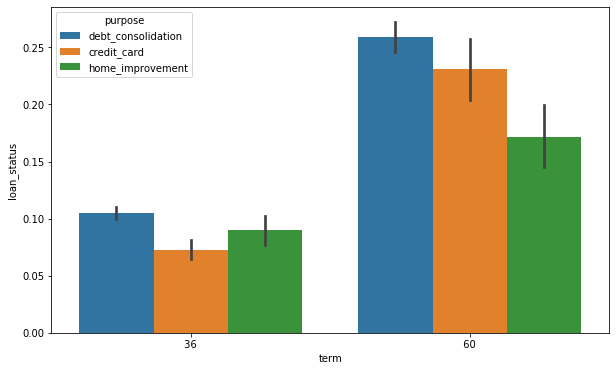

In [82]:
seg_plot('term')

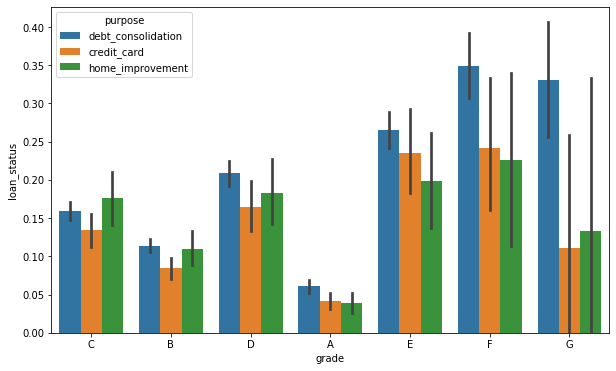

In [83]:
seg_plot('grade')

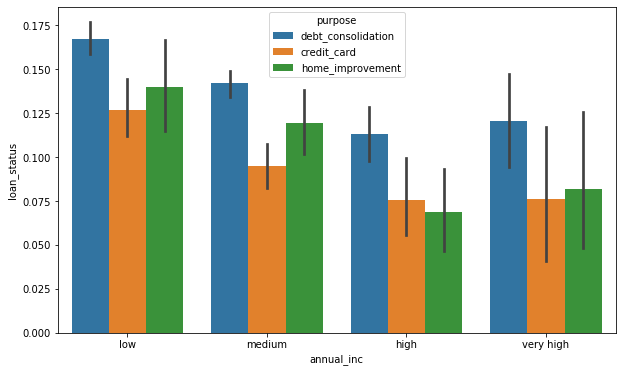

In [84]:
seg_plot('annual_inc')

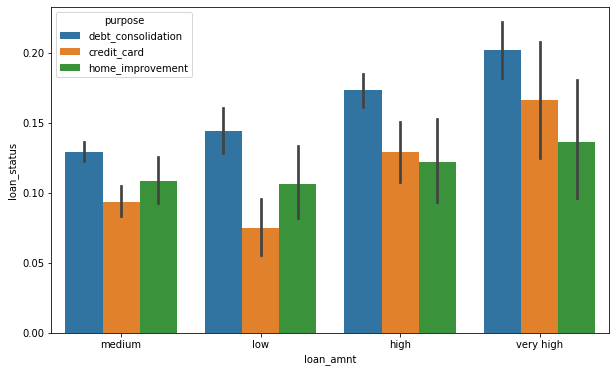

In [85]:
seg_plot('loan_amnt')

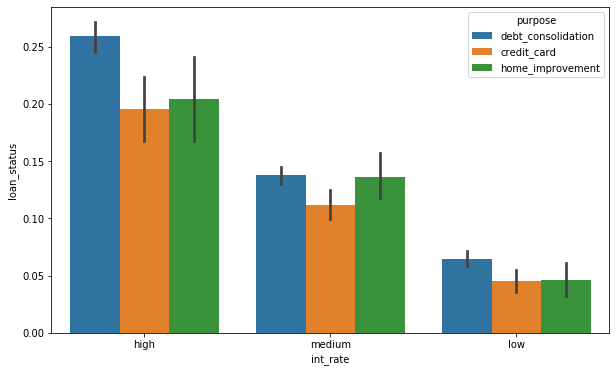

In [86]:
seg_plot('int_rate')

### It can be seen in the above segmented analysis that 'debt consolidation' purpose leads to mximum default w.r.t. term, grade, annual amount and other variables.  

## Bivariate Analysis
**In this section, we will do Bivariate analysis.It is the simplest form of analyzing data with respect to the target variable(Loan_status).**

#### loan_amnt vs verification_status vs loan status

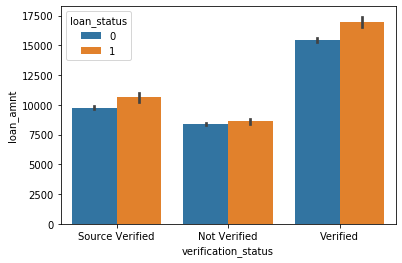

In [87]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)

#### This shows loans with higher amount are verified more and since higher amount loan has higher chances of default. That is the reason verified loans tend to default more !

#### loan_amnt vs grade vs loan status

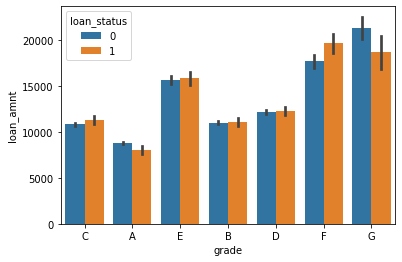

In [88]:

sns.barplot(x='grade', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)


#### Loan amount increases with grade and so does the chances of default !

#### loan_amnt vs term vs loan status

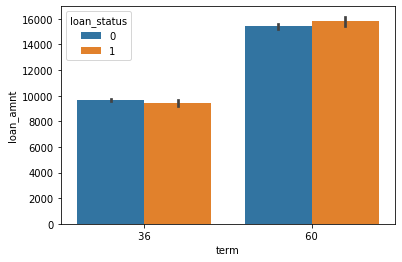

In [89]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)

#### Higher loan amount has more duration to repay the loan and more the duration, more chances of default !

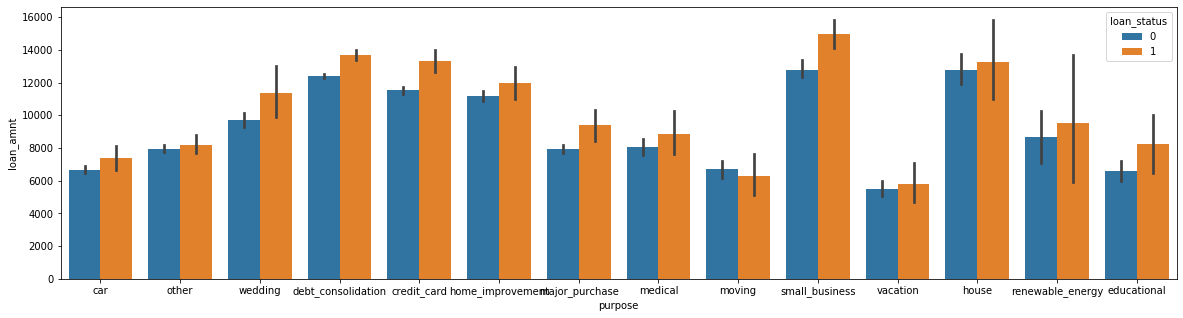

In [90]:
plt.figure(figsize=(20,5))
sns.barplot(x='purpose', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)
plt.show()

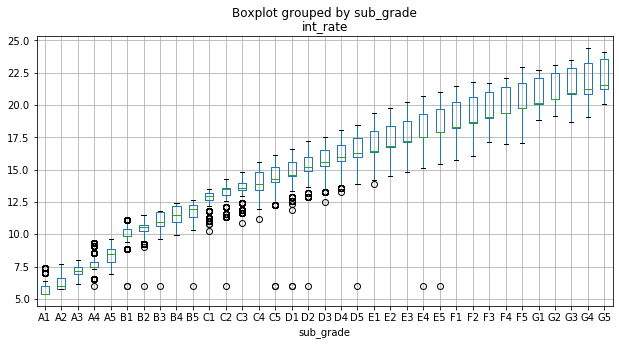

In [91]:
loan_df.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

#### Interest rates are directly prop to subgrades.

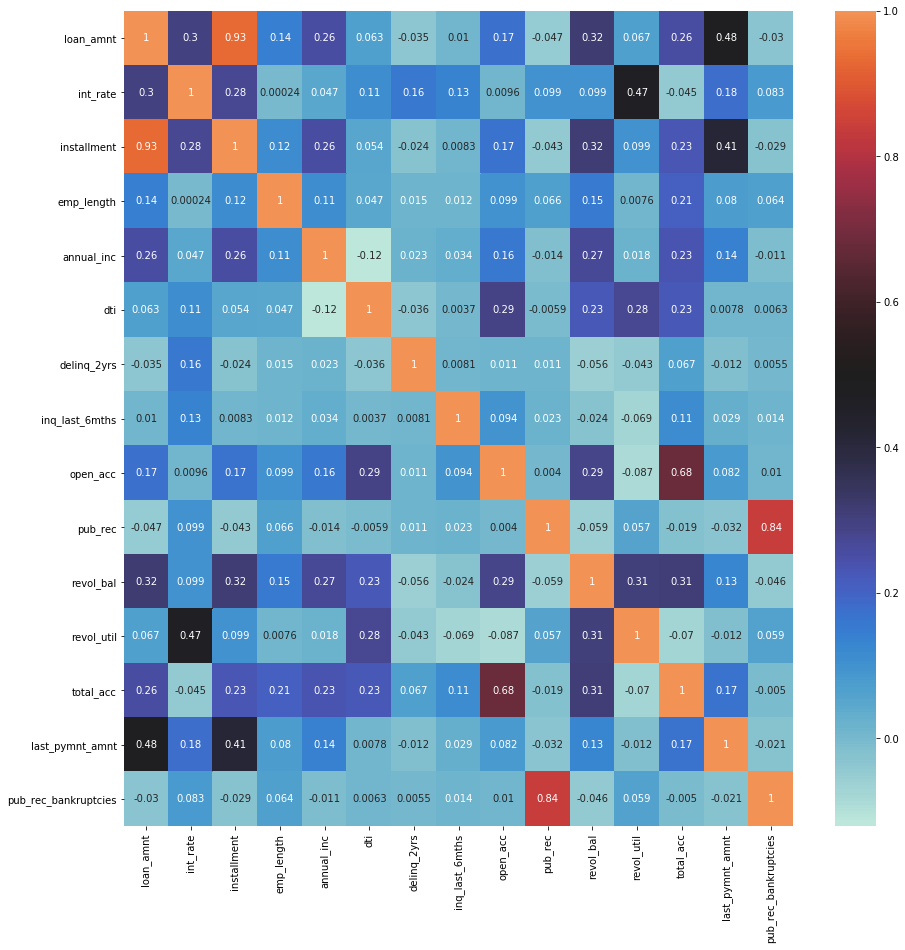

In [92]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr =loan_df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

#### int_rate is correlated to revol_util with r factor of .47 - This is favourable, as bank is charging higher interest from riskier loan.
#### loan_amnt revol_bal are correlated with r factor .35 - This is not favourable as it suggests that higher loan amount is being approved to riskier borrowers.
